<a href="https://colab.research.google.com/github/amalsalilan/DataInsight_Sales_Data_Analysis_and_Visualization_Infosys_Internship_Dec2024/blob/K-Pavitra/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt   #installed the libraries required
%matplotlib inline


In [6]:
!python -m pip install prophet

In [7]:
from prophet import Prophet #imported prophet model

In [8]:
df=pd.read_csv('/content/Modelling dataset.csv')
df.head()

,OrderDate,Sales
0,01-01-2012,180.36
1,01-01-2012,872.48
2,02-01-2012,1239.06
3,02-01-2012,614.80
4,02-01-2012,4083.19


In [9]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%m-%Y') #converted the format of date from object to datetime
df['OrderDate']

,OrderDate
0,2012-01-01
1,2012-01-01
2,2012-01-02
3,2012-01-02
4,2012-01-02
...,...
8394,2015-12-30
8395,2015-12-30
8396,2015-12-30
8397,2015-12-30


In [10]:
data=df[['OrderDate','Sales']]
data

,OrderDate,Sales
0,2012-01-01,180.36
1,2012-01-01,872.48
2,2012-01-02,1239.06
3,2012-01-02,614.80
4,2012-01-02,4083.19
...,...,...
8394,2015-12-30,448.10
8395,2015-12-30,257.46
8396,2015-12-30,14.15
8397,2015-12-30,803.33


In [11]:
monthly_sales = df.resample('M', on='OrderDate')['Sales'].sum()

<ipython-input-11-d5580330a85b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='OrderDate')['Sales'].sum()


In [12]:
monthly_sales

,Sales
OrderDate,
2012-01-31,516302.9595
2012-02-29,332480.6365
2012-03-31,411628.7290
2012-04-30,393276.4820
2012-05-31,230145.5380
2012-06-30,263456.0680
2012-07-31,380503.9700
2012-08-31,329754.7150
2012-09-30,325292.3145


<Axes: xlabel='OrderDate'>

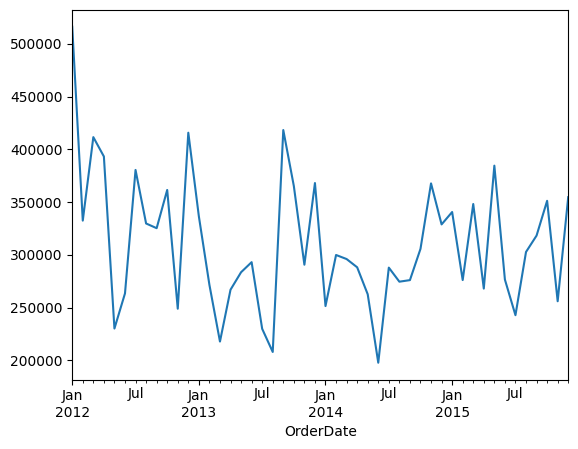

In [13]:
monthly_sales.plot()

Observations:
It can be observed that the monthly sales are fluctuating throughout.

In [14]:
monthly_sales = monthly_sales.reset_index() # Reset the index to make 'OrderDate' a column
monthly_sales.columns = ["ds", "y"]       # Rename the columns to 'ds' and 'y'

In [15]:
monthly_sales

,ds,y
0,2012-01-31,516302.9595
1,2012-02-29,332480.6365
2,2012-03-31,411628.7290
3,2012-04-30,393276.4820
4,2012-05-31,230145.5380
5,2012-06-30,263456.0680
6,2012-07-31,380503.9700
7,2012-08-31,329754.7150
8,2012-09-30,325292.3145
9,2012-10-31,361555.2665


In [16]:
#separated data for training and testing
train=monthly_sales[:round(len(monthly_sales)*80/100)]
test=monthly_sales[round(len(monthly_sales)*80/100):]

In [17]:
train_date_range = (train['ds'].min(), train['ds'].max())
test_date_range = (test['ds'].min(), test['ds'].max())

train_date_range, test_date_range

((Timestamp('2012-01-31 00:00:00'), Timestamp('2015-02-28 00:00:00')),
 (Timestamp('2015-03-31 00:00:00'), Timestamp('2015-12-31 00:00:00')))

In [18]:
from prophet import Prophet
model=Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3cd9xng/jwqyi3_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3cd9xng/1wwm87m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82689', 'data', 'file=/tmp/tmpr3cd9xng/jwqyi3_s.json', 'init=/tmp/tmpr3cd9xng/1wwm87m0.json', 'output', 'file=/tmp/tmpr3cd9xng/prophet_model1n_jw4s7/prophet_model-20250123090519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [20]:
#for future forcasting of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [21]:
#predictions
prediction=model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,354491.030478,414807.917375,515386.331216,354491.030478,354491.030478,110154.704581,110154.704581,110154.704581,110154.704581,110154.704581,110154.704581,0.0,0.0,0.0,464645.735059
1,2012-02-29,352623.135483,278210.688222,379349.172131,352623.135483,352623.135483,-24275.816483,-24275.816483,-24275.816483,-24275.816483,-24275.816483,-24275.816483,0.0,0.0,0.0,328347.319000
2,2012-03-31,350626.420114,320487.024954,427941.227360,350626.420114,350626.420114,21596.091190,21596.091190,21596.091190,21596.091190,21596.091190,21596.091190,0.0,0.0,0.0,372222.511304
3,2012-04-30,348694.114764,313529.036308,415587.413614,348694.114764,348694.114764,14226.418218,14226.418218,14226.418218,14226.418218,14226.418218,14226.418218,0.0,0.0,0.0,362920.532982
4,2012-05-31,346697.399317,181454.418389,280667.734690,346697.399317,346697.399317,-117220.813997,-117220.813997,-117220.813997,-117220.813997,-117220.813997,-117220.813997,0.0,0.0,0.0,229476.585320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2016-02-24,259039.447850,24404.537968,130043.337826,259031.727417,259046.550654,-180703.499673,-180703.499673,-180703.499673,-180703.499673,-180703.499673,-180703.499673,0.0,0.0,0.0,78335.948176
399,2016-02-25,258975.226924,89287.884714,188974.096692,258967.447387,258982.364585,-119249.944881,-119249.944881,-119249.944881,-119249.944881,-119249.944881,-119249.944881,0.0,0.0,0.0,139725.282043
400,2016-02-26,258911.005998,138593.875833,234950.951944,258903.167357,258918.178515,-71467.137325,-71467.137325,-71467.137325,-71467.137325,-71467.137325,-71467.137325,0.0,0.0,0.0,187443.868673
401,2016-02-27,258846.785072,165427.417149,271980.646904,258838.887327,258853.983965,-38982.486313,-38982.486313,-38982.486313,-38982.486313,-38982.486313,-38982.486313,0.0,0.0,0.0,219864.298760


In [22]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-31,464645.735059,414807.917375,515386.331216
1,2012-02-29,328347.319000,278210.688222,379349.172131
2,2012-03-31,372222.511304,320487.024954,427941.227360
3,2012-04-30,362920.532982,313529.036308,415587.413614
4,2012-05-31,229476.585320,181454.418389,280667.734690


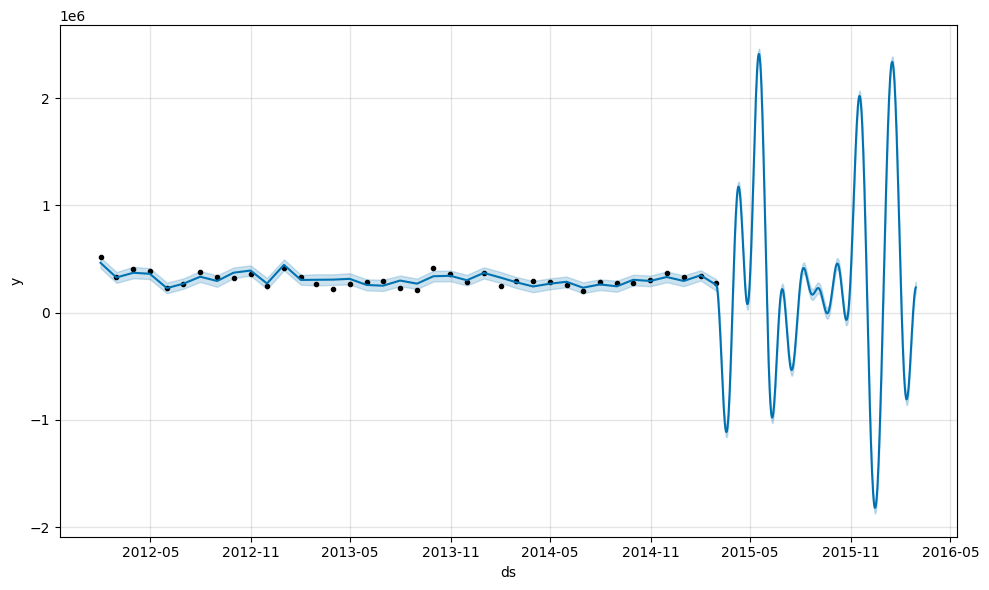

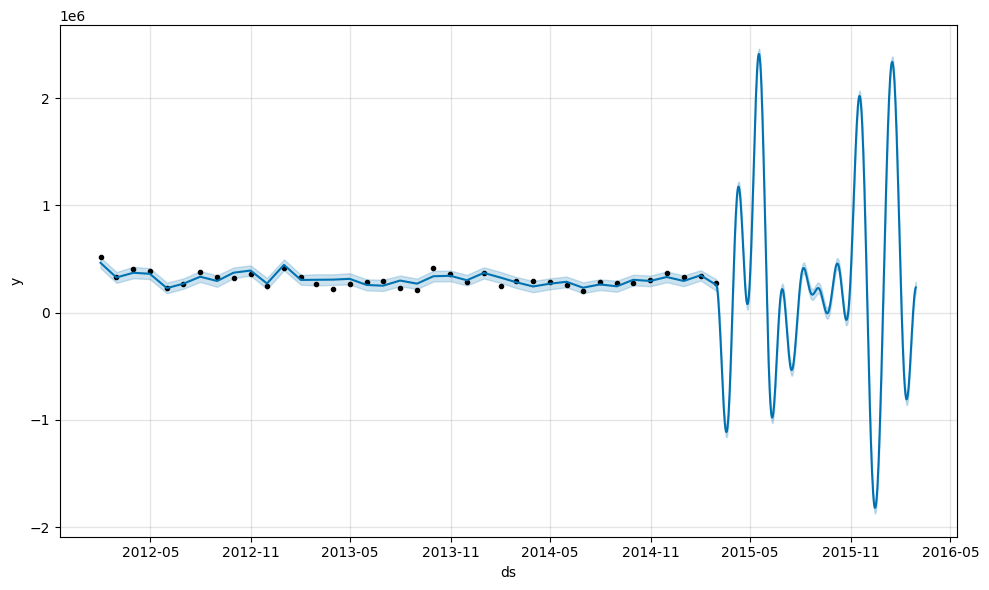

In [23]:
#plot
model.plot(prediction)
#blue line represents predicted values while black dots represents the data in our dataset

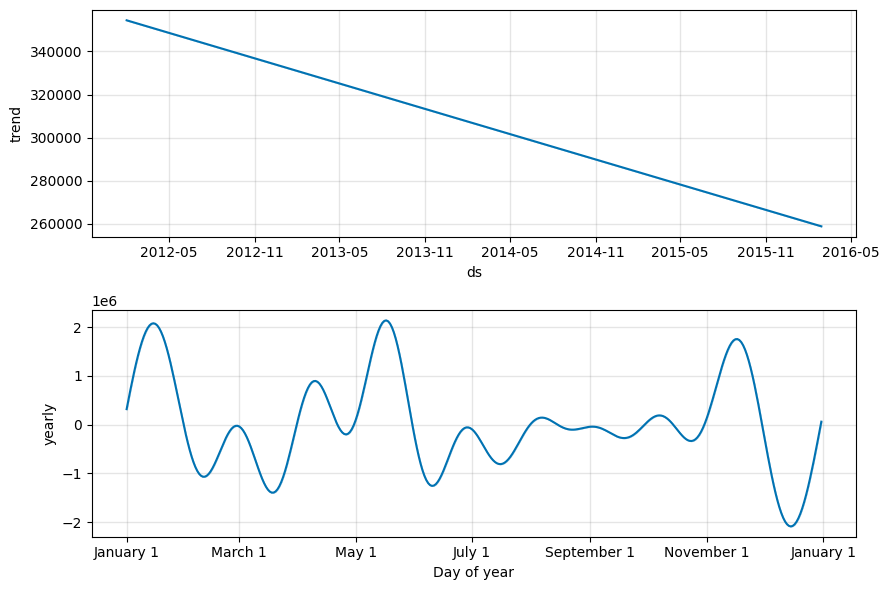

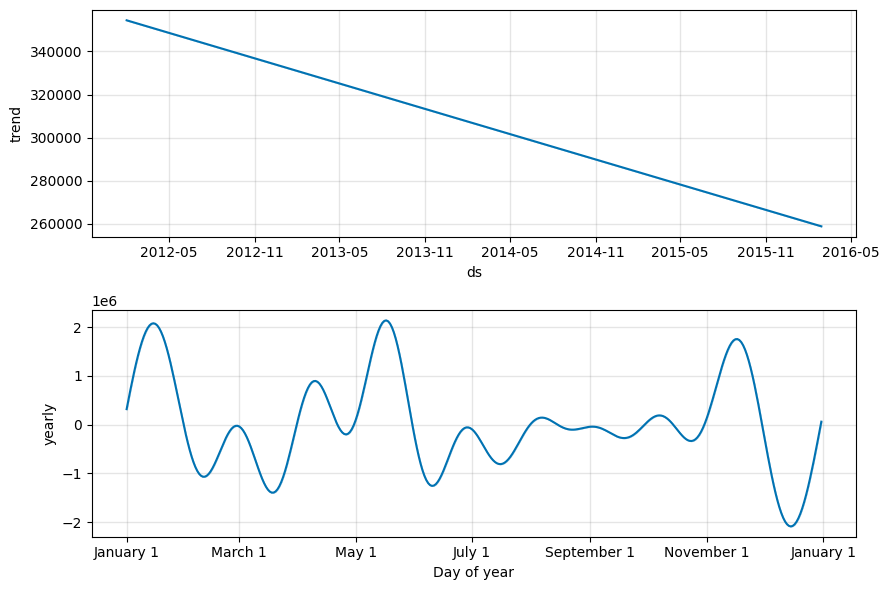

In [24]:
model.plot_components(prediction)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
forecast = model.predict(test)

# Calculate metrics
rmae = sqrt(mean_absolute_error(test['y'], forecast['yhat']))
print(rmae)


287.37882403874653


Observations:
Out of the 3 models used ARIMA,SARIMA AND PROPHET prophet shows the correct results and also the error generated is also less in case of Prophet as compared to other models .


In [26]:
#saving this model for future purpose
from joblib import dump, load
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [27]:
from joblib import dump
# Save the trained Prophet model
dump(model, 'predicted_sales.joblib')
print("Model saved as 'predicted_sales.joblib'")


Model saved as 'predicted_sales.joblib'
